![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [32]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [33]:
#encoding categorical values
penguins_df['sex'] = pd.get_dummies(penguins_df['sex'], drop_first= True)
penguins_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,36.7,19.3,193.0,3450.0,0
4,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...
327,47.2,13.7,214.0,4925.0,0
328,46.8,14.3,215.0,4850.0,0
329,50.4,15.7,222.0,5750.0,1
330,45.2,14.8,212.0,5200.0,0


In [34]:
#scaling
scaler = StandardScaler()
penguins_df_scaled = scaler.fit_transform(penguins_df)
penguins_df_scaled

array([[-0.90390586,  0.79035987, -1.42534179, -0.56694801,  0.99399394],
       [-0.83043377,  0.12618674, -1.0685765 , -0.50484747, -1.00604235],
       [-0.68348959,  0.43272819, -0.42639899, -1.18795343, -1.00604235],
       ...,
       [ 1.17168063, -0.74234736,  1.50013355,  1.91707363,  0.99399394],
       [ 0.21654349, -1.20215952,  0.78660298,  1.23396768, -1.00604235],
       [ 1.07984052, -0.53798639,  0.85795603,  1.48236985,  0.99399394]])

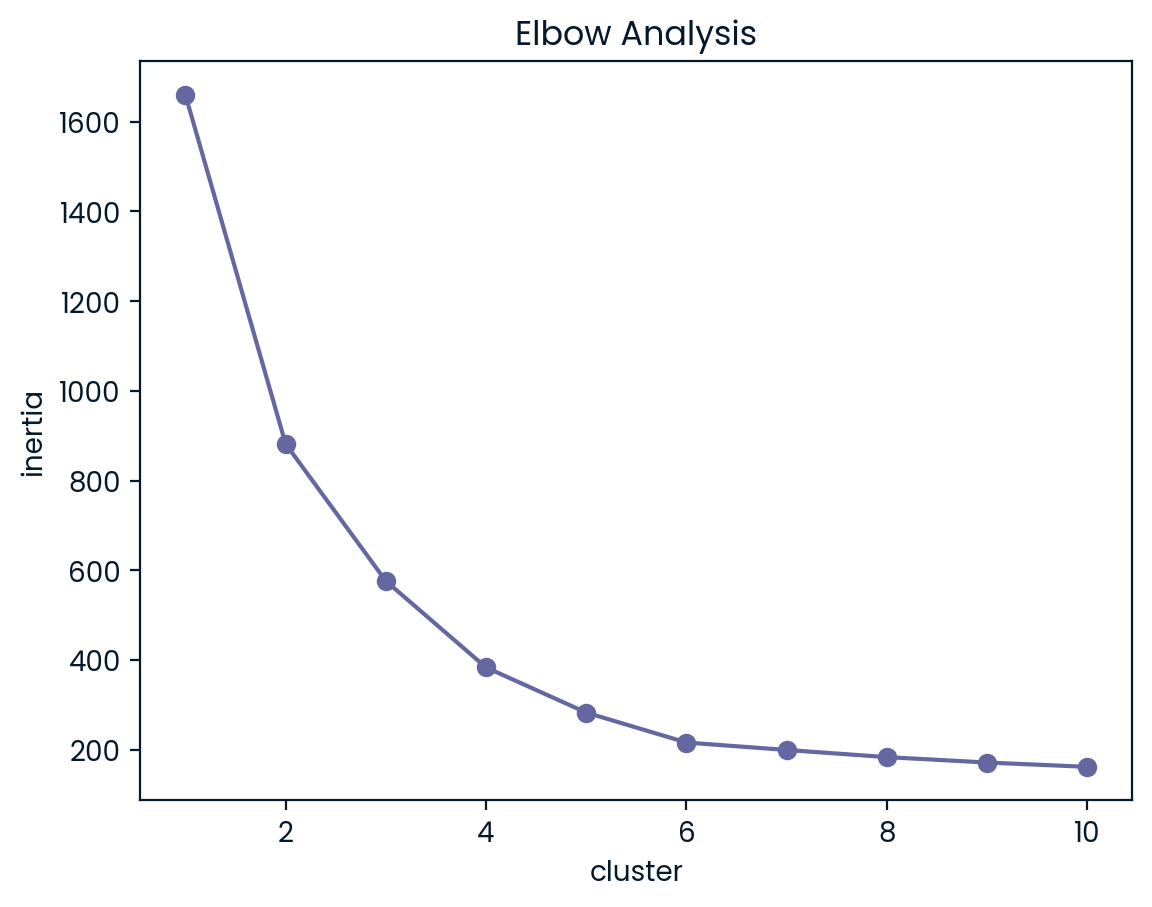

In [35]:
#Elbow Analysis
cluster = range(1,11)
inertia = []
for k in cluster:
    kmeans = KMeans(n_clusters=k, random_state= 42)
    kmeans.fit(penguins_df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(cluster,inertia, marker = 'o')
plt.xlabel('cluster')
plt.ylabel('inertia')
plt.title('Elbow Analysis')
plt.show()

In [36]:
#Clustering
kmeans = KMeans(n_clusters=4)
cluster_label = kmeans.fit_predict(penguins_df_scaled)
cluster_label

array([1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2,
       2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2,
       1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 3, 0, 3, 0, 0, 3, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 0, 3, 0,
       0, 3, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 3, 0, 3, 0, 0, 3, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,

In [37]:
#creating a statistical DatFrame for each cluster

#Adding cluster labels to original dataframe
penguins_df['cluster'] = cluster_label

#Statistical DatFrame
stat_penguins = penguins_df.groupby('cluster').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
cluster,,,,,
0,49.473770,15.718033,221.540984,5484.836066,1.0
1,43.878302,19.111321,194.764151,4006.603774,1.0
2,40.217757,17.611215,189.046729,3419.158879,0.0
3,45.563793,14.237931,212.706897,4679.741379,0.0
